# BUILDING

In [1]:
import csv

with open("inverse.txt") as file:
    ratings = file.readline().strip().split(",")
    widths = file.readline().strip().split(",")

cs = []
with open("coffee.csv") as file:
    reader = csv.DictReader(file)
    for item in reader:
        cs.append(item)
for i in range(len(cs)):
    cs[i]["rating"] = f"{int(ratings[i])//10}"
    cs[i]["width"] = f"{int(widths[i])//10}"

with open('coffee.csv', 'w') as f:
    writer = csv.DictWriter(f, ['country', 'bean', 'roast', 'width', 'rating'])
    writer.writeheader()
    for d in cs:
        writer.writerow(d)
        
# print(ratings)

# SOLVING

In [2]:
import csv

class Coffee:
    def __init__(self, country, bean, roast, width, rating):
        self.country = country
        self.bean = bean
        self.roast = roast
        self.width = int(width)
        self.rating = int(rating)
    
    def __repr__(self):
        return f"{self.country:<25}{self.bean:<9}{self.roast:<17} ({self.width}mm, {self.rating}⭐️)"

class Shelf:
    def __init__(self, capacity):
        self.c = capacity
        self.coffees = []
        
    def total_people(self):
        return sum(x.rating for x in self.coffees)
        
    def __repr__(self):
        return "\n".join(f"{i}" for i in sorted(self.coffees, key=lambda x: x.rating, reverse=True))
        

def solve(coffees, shelf):
    numitems = len(coffees)
    T = [[0 for _ in range(shelf.c + 1)] for _ in range(numitems + 1)]
    keep = [[0 for _ in range(shelf.c + 1)] for _ in range(numitems + 1)]

    for i in range(1, numitems + 1):
        for w in range(shelf.c + 1):
            itemValue = coffees[i - 1].rating
            itemWeight = coffees[i - 1].width
            newBest = itemValue + T[i - 1][w - itemWeight] if w >= itemWeight else 0

            if itemWeight <= w and T[i - 1][w] < newBest:
                T[i][w] = newBest
                keep[i][w] = 1
            else:
                T[i][w] = T[i - 1][w]
                keep[i][w] = 0

    w = shelf.c
    selected = []
    for i in range(numitems, 0, -1):
        if keep[i][w] == 1:
            w -= coffees[i - 1].width
            shelf.coffees.append(coffees[i - 1])

    return T[numitems][shelf.c]


with open("coffee.csv") as file:
    coffees = [Coffee(**item) for item in csv.DictReader(file)]

shelf = Shelf(506)
solve(coffees, shelf)
print(shelf.total_people())
print(shelf)

642
United States of America Liberica Blonde Roast      (141mm, 196⭐️)
Chile                    Robusta  Dark Roast        (154mm, 194⭐️)
Iceland                  Robusta  Medium Roast      (125mm, 160⭐️)
Angola                   Arabica  Vienna Roast      (67mm, 83⭐️)
Finland                  Excelsa  French Roast      (19mm, 9⭐️)


# Part 2

In [3]:
import csv

class Coffee:
    def __init__(self, country, bean, roast, width, rating):
        self.country = country
        self.bean = bean
        self.roast = roast
        self.width = int(width)
        self.rating = int(rating)
    
    def __repr__(self):
        return f"{self.country:<25}{self.bean:<9}{self.roast:<17} ({self.width}mm, {self.rating}⭐️)"

class Shelf:
    def __init__(self, capacity):
        self.c = capacity
        self.coffees = []
        
    def total_people(self):
        return sum(x.rating for x in self.coffees)
        
    def __repr__(self):
        return "\n".join(f"{i}" for i in sorted(self.coffees, key=lambda x: x.rating, reverse=True))
        

def solve(coffees, shelves):
    numitems = len(coffees)
    numshelves = len(shelves)
    coffees.sort(key=lambda x: x.rating / x.width, reverse=True)

    for coffee in coffees:
        best_shelf = -1
        best_value = 0
        for j in range(numshelves):
            if coffee.width <= shelves[j].c:
                value = coffee.rating + solve_knapsack(coffees, coffee.width)
                if value > best_value:
                    best_value = value
                    best_shelf = j
        if best_shelf!= -1:
            shelves[best_shelf].coffees.append(coffee)
            shelves[best_shelf].c -= coffee.width

    total_value = sum(sum(coffee.rating for coffee in shelf.coffees) for shelf in shelves)
    return total_value

def solve_knapsack(coffees, capacity):
    numitems = len(coffees)
    T = [0] * (capacity + 1)

    for i in range(1, numitems + 1):
        for w in range(capacity, 0, -1):
            itemValue = coffees[i - 1].rating
            itemWeight = coffees[i - 1].width
            if itemWeight <= w:
                T[w] = max(T[w], itemValue + T[w - itemWeight])

    return T[capacity]


with open("coffee.csv") as file:
    coffees = [Coffee(**item) for item in csv.DictReader(file)]

shelves = [Shelf(506), Shelf(481), Shelf(503)]
solve(coffees, shelves)

for ix, shelf in enumerate(shelves, 1):
    print(f"Total on shelf {ix}: {shelf.total_people()}")
    print(shelf)
    print()

print(sum(x.total_people() for x in shelves))

Total on shelf 1: 642
United States of America Liberica Blonde Roast      (141mm, 196⭐️)
Chile                    Robusta  Dark Roast        (154mm, 194⭐️)
Iceland                  Robusta  Medium Roast      (125mm, 160⭐️)
Angola                   Arabica  Vienna Roast      (67mm, 83⭐️)
Finland                  Excelsa  French Roast      (19mm, 9⭐️)

Total on shelf 2: 556
Georgia                  Arabica  Blonde Roast      (103mm, 126⭐️)
Jordan                   Arabica  French Roast      (110mm, 123⭐️)
Yemen                    Arabica  Dark Roast        (106mm, 122⭐️)
Pakistan                 Robusta  Vienna Roast      (105mm, 119⭐️)
Armenia                  Robusta  Extra Dark Roast  (57mm, 66⭐️)

Total on shelf 3: 527
Kyrgyzstan               Robusta  Extra Dark Roast  (136mm, 137⭐️)
Indonesia                Robusta  Light Roast       (124mm, 136⭐️)
China                    Arabica  Vienna Roast      (109mm, 117⭐️)
Papua New Guinea         Liberica Extra Dark Roast  (90mm, 97⭐️)
Jap

In [4]:
f"{sum(x.total_people() for x in shelves)/sum(x.rating for x in coffees)*100:.2f}%"

'25.41%'

/var/folders/d0/38_wsl7s2f30rj7__yf1kg3h0000gn/T/ipykernel_7650/3488091065.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/d0/38_wsl7s2f30rj7__yf1kg3h0000gn/T/ipykernel_7650/3488091065.py:25: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = country_list.centroid


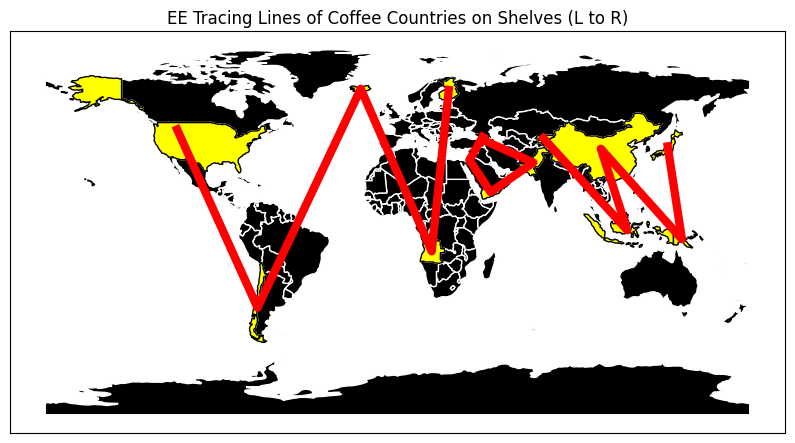

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

countries = [
    ['United States of America', 'Chile', 'Iceland', 'Angola', 'Finland'], 
    ['Georgia', 'Jordan', 'Yemen', 'Pakistan', 'Armenia'],
    ["Kyrgyzstan", "Indonesia", "China", "Papua New Guinea", "Japan"],
]

selected_countries = []
for country_group in countries:
    country_df = world[world['name'].isin(country_group)]
    country_df = country_df.sort_values(by='name', key=lambda x: [country_group.index(i) for i in x])
    selected_countries.append(country_df)

ax = world.plot(figsize=(10, 6), color='black', edgecolor='white')

for sc in selected_countries:
    sc.plot(ax=ax, color='yellow', edgecolor='black')

for country_list in selected_countries:
    centroids = country_list.centroid
    line = LineString([point.coords[0] for point in centroids])
    plt.plot(*line.xy, color='red', linewidth=6)
plt.xticks([])
plt.yticks([])
plt.title('EE Tracing Lines of Coffee Countries on Shelves (L to R)')
plt.savefig("EE.png")
plt.show()

In [5]:
from PIL import Image, ImageSequence

def process_gif(input_path, output_path):
    with Image.open(input_path) as im:
        frames = []
        durations = []
        for frame in ImageSequence.Iterator(im):
            frames.append(frame.copy())
            durations.append(frame.info['duration'])

        frames[0].save(
            output_path,
            save_all=True,
            append_images=frames[1:-1],
            loop=None,
            duration=durations
        )


input_gif = "animatedmap.gif"
output_gif = "animatedmap_norep.gif"

process_gif(input_gif, output_gif)
print("DONE")

DONE
